In [34]:
#!pip install wordcloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
os.getcwd()

'C:\\Users\\OWNER\\Documents\\Enhance IT\\Week_6'

In [37]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'cleaned_data.csv',
 'cleaned_tweets.csv',
 'Text Preprocessing.ipynb',
 'uglywords.csv',
 'uglywords.xlsx',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [38]:
#Load text
text = pd.read_csv('uglywords.csv', encoding = 'latin1')
text['Tweet'].head(10)

0    *screams in 25 different languages*                                                                                                        
1    Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB   
2    Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb                                                   
3    My emotions are a train wreck. My body is a train wreck. I'm a wreck                                                                       
4    Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke http://t.co/gvd7fcx8iZ   
5    @TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.                                        
6    brooke just face timed me at the concert and just screamed for 2 minutes straight                                            

In [39]:
text.shape

(739, 2)

In [40]:
list(text.columns.values)

['Label', 'Tweet']

In [41]:
# let us see the count of sentiments by each category, negative (0) vs. positive sentiments (1)
print(text.Label.value_counts())

0.0    471
1.0    267
Name: Label, dtype: int64


In [42]:
## Tokenize the text

In [43]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
def normalizer(tweet):
    no_urls = re.sub(r"http\S+", " " ,tweet)
    only_letters = re.sub("[^a-zA-Z]", " ",no_urls)
    tokens = nltk.word_tokenize(only_letters)[2 :]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [46]:
normalizer('Shamiso is so dangerous because you never know what her emotions mean')

['dangerous', 'never', 'know', 'emotion', 'mean']

In [47]:
pd.set_option('display.max_colwidth', -1)
text['normalized_tweet'] = text.Tweet.apply(normalizer)
text[['Tweet', 'normalized_tweet']].head(10)

C:\Users\OWNER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Tweet,normalized_tweet
0,*screams in 25 different languages*,"[different, language]"
1,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB,"[sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]"
2,Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb,"[aba, woman, delivers, baby, without, face, photo]"
3,My emotions are a train wreck. My body is a train wreck. I'm a wreck,"[train, wreck, body, train, wreck, wreck]"
4,Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke http://t.co/gvd7fcx8iZ,"[livestream, burned, butter, touched, hot, plate, soon, made, nut, joke]"
5,@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.,"[another, stand, user, detonate, killer, queen]"
6,brooke just face timed me at the concert and just screamed for 2 minutes straight,"[face, timed, concert, screamed, minute, straight]"
7,A group of Florida Forest Service firefighters could be deployed to California to help contain fires. Details at 10! http://t.co/fwuP9YURzY,"[florida, forest, service, firefighter, could, deployed, california, help, contain, fire, detail]"
8,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/iTBJ6DKRZI,"[atomic, bomb, japan, still, struggle, war, past, anniversary, devastation, wrought, b]"
9,The majority of those killed were civilians on the ground after the jet first bombed the city's main street then dramatically plummeted,"[killed, civilian, ground, jet, first, bombed, city, main, street, dramatically, plummeted]"


In [48]:
text.normalized_tweet.head()

0    [different, language]                                                    
1    [sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]
2    [aba, woman, delivers, baby, without, face, photo]                       
3    [train, wreck, body, train, wreck, wreck]                                
4    [livestream, burned, butter, touched, hot, plate, soon, made, nut, joke] 
Name: normalized_tweet, dtype: object

In [49]:
test = 'https://www.shatorangola.com is the best company where you can buy all your PPE and get help with visual inspection whenever you need it%?//267'

In [50]:
test = normalizer(test)

In [51]:
test

['best',
 'company',
 'buy',
 'ppe',
 'get',
 'help',
 'visual',
 'inspection',
 'whenever',
 'need']

In [52]:
data = text.Tweet.values
# remove urls
data_1 = []
for d in data:
    ws = d.split(' ')
    for i, w in enumerate(ws):
        if 'http' in w:
            print (w)

http://t.co/ZA4AXFJSVB
http://t.co/c5u9qshhnb
http://t.co/gvd7fcx8iZ
http://t.co/fwuP9YURzY
http://t.co/iTBJ6DKRZI
http://t.co/tYeWZf3hqA
http://t.co/lrx0sDsNHM
http://t.co/TsaLetFtkt
http://t.co/BabMf0W2YW
http://t.co/pw3tZU0tay
http://t.co/wjWYJBncat
http://t.co/0Erisq25KT
http://t.co/ZBZc8905Gl
https://t.co/2BE7BwcMpl
http://t.co/DTdidinQyF
http://t.co/OSKfyj8CK7
http://t.co/C9t2F6DLtM
http://t.co/cwZ37lNDVk
https://t.co/ldjet9tfMk
https://t.co/MctJnZX4H8
https://t.co/J3dI85IST5
http://t.co/8JvQI9UspL
http://t.co/m2y9Ym3iF6
http://t.co/KQJevYqzLV
http://t.co/HmWhob7prs
http://t.co/2RAcaiVFfq
http://t.co/rjEbpiB5rZ
http://t.co/I7ap1MES8M
http://t.co/ugzu9iqPRW
http://t.co/xFguklrlTf
http://t.co/FeGu8hWMc4
http://t.co/1kRPz3j1EU
http://t.co/pFMn63VnAm
http://t.co/vKwqbOJFJc
http://t.co/vEcsoSRleR
http://t.co/fiUOgj6hEF
http://t.co/2Z2HTDjQZD
http://t.co/fMj8MXJY8a
https://t.co/3hoIkDmoCB
http://t.co/JHc2RT0V9F
http://t.co/v9ftYB30EI
http://t.co/ObiX79NcxN
http://t.co/hVxu1Zcvau
http:/

In [53]:
text.normalized_tweet.head(10)

0    [different, language]                                                                            
1    [sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]                        
2    [aba, woman, delivers, baby, without, face, photo]                                               
3    [train, wreck, body, train, wreck, wreck]                                                        
4    [livestream, burned, butter, touched, hot, plate, soon, made, nut, joke]                         
5    [another, stand, user, detonate, killer, queen]                                                  
6    [face, timed, concert, screamed, minute, straight]                                               
7    [florida, forest, service, firefighter, could, deployed, california, help, contain, fire, detail]
8    [atomic, bomb, japan, still, struggle, war, past, anniversary, devastation, wrought, b]          
9    [killed, civilian, ground, jet, first, bombed, city, main, street, d

In [54]:
text[['Tweet', 'normalized_tweet']].head(10)

,Tweet,normalized_tweet
0,*screams in 25 different languages*,"[different, language]"
1,Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB,"[sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]"
2,Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb,"[aba, woman, delivers, baby, without, face, photo]"
3,My emotions are a train wreck. My body is a train wreck. I'm a wreck,"[train, wreck, body, train, wreck, wreck]"
4,Alton brown just did a livestream and he burned the butter and touched the hot plate too soon and made a nut joke http://t.co/gvd7fcx8iZ,"[livestream, burned, butter, touched, hot, plate, soon, made, nut, joke]"
5,@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.,"[another, stand, user, detonate, killer, queen]"
6,brooke just face timed me at the concert and just screamed for 2 minutes straight,"[face, timed, concert, screamed, minute, straight]"
7,A group of Florida Forest Service firefighters could be deployed to California to help contain fires. Details at 10! http://t.co/fwuP9YURzY,"[florida, forest, service, firefighter, could, deployed, california, help, contain, fire, detail]"
8,70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/iTBJ6DKRZI,"[atomic, bomb, japan, still, struggle, war, past, anniversary, devastation, wrought, b]"
9,The majority of those killed were civilians on the ground after the jet first bombed the city's main street then dramatically plummeted,"[killed, civilian, ground, jet, first, bombed, city, main, street, dramatically, plummeted]"


In [55]:
#drop the tweet column and just remain with the clean one
text = text.drop(['Tweet'], axis = 1)

In [56]:
text.head(10)

,Label,normalized_tweet
0,1.0,"[different, language]"
1,0.0,"[sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]"
2,0.0,"[aba, woman, delivers, baby, without, face, photo]"
3,0.0,"[train, wreck, body, train, wreck, wreck]"
4,1.0,"[livestream, burned, butter, touched, hot, plate, soon, made, nut, joke]"
5,1.0,"[another, stand, user, detonate, killer, queen]"
6,1.0,"[face, timed, concert, screamed, minute, straight]"
7,0.0,"[florida, forest, service, firefighter, could, deployed, california, help, contain, fire, detail]"
8,0.0,"[atomic, bomb, japan, still, struggle, war, past, anniversary, devastation, wrought, b]"
9,0.0,"[killed, civilian, ground, jet, first, bombed, city, main, street, dramatically, plummeted]"


In [57]:
#Now we shall look at the words that contributed to each type of sentiment more than the other

In [58]:
from nltk import ngrams
def ngrams(input_list):
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams + trigrams
text['grams'] = text.normalized_tweet.apply(ngrams)
text[['grams']].head()

,grams
0,[different language]
1,"[sue legionnaire, legionnaire family, family affected, affected fatal, fatal outbreak, outbreak legionnaire, legionnaire disea, sue legionnaire family, legionnaire family affected, family affected fatal, affected fatal outbreak, fatal outbreak legionnaire, outbreak legionnaire disea]"
2,"[aba woman, woman delivers, delivers baby, baby without, without face, face photo, aba woman delivers, woman delivers baby, delivers baby without, baby without face, without face photo]"
3,"[train wreck, wreck body, body train, train wreck, wreck wreck, train wreck body, wreck body train, body train wreck, train wreck wreck]"
4,"[livestream burned, burned butter, butter touched, touched hot, hot plate, plate soon, soon made, made nut, nut joke, livestream burned butter, burned butter touched, butter touched hot, touched hot plate, hot plate soon, plate soon made, soon made nut, made nut joke]"


In [59]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [60]:
#word counts per label in from high to low
text[(text.Label == 1)][['grams']].apply(count_words)['grams'].most_common(15)

[('gon na', 4),
 ('forest fire', 3),
 ('full read', 3),
 ('body bag', 2),
 ('year old', 2),
 ('anybody else', 2),
 ('read ebay', 2),
 ('full read ebay', 2),
 ('issue issue', 2),
 ('syrian refugee', 2),
 ('quarantine offensive', 2),
 ('offensive content', 2),
 ('quarantine offensive content', 2),
 ('high school', 2),
 ('meat loving', 2)]

In [61]:
#word counts per label in from high to low
text[(text.Label == 0)][['grams']].apply(count_words)['grams'].most_common(15)

[('airport get', 5),
 ('get swallowed', 5),
 ('swallowed sandstorm', 5),
 ('sandstorm minute', 5),
 ('airport get swallowed', 5),
 ('get swallowed sandstorm', 5),
 ('swallowed sandstorm minute', 5),
 ('oil spill', 5),
 ('mass murder', 4),
 ('northern california', 4),
 ('disaster typhoon', 4),
 ('typhoon devastated', 4),
 ('devastated saipan', 4),
 ('disaster typhoon devastated', 4),
 ('typhoon devastated saipan', 4)]

In [62]:
#Writing clean file to computer

In [63]:
text = text.drop(['grams'], axis = 1)

In [64]:
text.to_csv('cleaned_data.csv')

In [65]:
##We start now training a model

In [84]:
#!pip install tensorflow
from sklearn.model_selection import train_test_split 
from tensorflow import keras
import tensorflow_hub as hub
import tensorflow_datasets as tfd
import tensorflow as tf

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\OWNER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-84-8e6dc80ca330>", line 4, in <module>
    import tensorflow_hub as hub
ModuleNotFoundError: No module named 'tensorflow_hub'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\OWNER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\OWNER\anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\OWNER\anaco

ModuleNotFoundError: No module named 'tensorflow_hub'

In [68]:
#create two datasets
labels = text.Label
text_clean = text.normalized_tweet

In [71]:
labels.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Label, dtype: float64

In [72]:
text_clean.head(5)

0    [different, language]                                                    
1    [sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]
2    [aba, woman, delivers, baby, without, face, photo]                       
3    [train, wreck, body, train, wreck, wreck]                                
4    [livestream, burned, butter, touched, hot, plate, soon, made, nut, joke] 
Name: normalized_tweet, dtype: object

In [74]:
#Split the dataset into training and test
x_train,x_test,y_train,y_test=train_test_split(text_clean,labels,
    test_size=0.2,
    random_state=123)

In [76]:
y_test.shape, y_train.shape, x_train.shape, x_test.shape

((148,), (591,), (591,), (148,))

In [82]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
#hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
#hub_layer(x_train)

In [83]:
embedding

'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'

In [91]:
positive_sentiments = text[(text.Label == 1)][['normalized_tweet']]
positive_sentiments

,normalized_tweet
0,"[different, language]"
4,"[livestream, burned, butter, touched, hot, plate, soon, made, nut, joke]"
5,"[another, stand, user, detonate, killer, queen]"
6,"[face, timed, concert, screamed, minute, straight]"
11,"[phone, worstoverdose, scream, jaileens, caked, phone, everyone, look]"
...,...
717,"[sophisticated, funny, good, natured, treat, slight, pleasure]"
719,"[seen, believed]"
729,"[pledged, make, every, effort, seek, world, without, nuclear, weapon]"
730,"[trapped, miner, released, chile, zippednews]"


In [90]:
negative_sentiments = text[(text.Label == 0)][['normalized_tweet']]
negative_sentiments

,normalized_tweet
1,"[sue, legionnaire, family, affected, fatal, outbreak, legionnaire, disea]"
2,"[aba, woman, delivers, baby, without, face, photo]"
3,"[train, wreck, body, train, wreck, wreck]"
7,"[florida, forest, service, firefighter, could, deployed, california, help, contain, fire, detail]"
8,"[atomic, bomb, japan, still, struggle, war, past, anniversary, devastation, wrought, b]"
...,...
734,"[held, hostage, network, due, affiliation, fee]"
735,"[im, scared, karma]"
736,"[change, language, around, traffic, fatality, need, go, back, future, visionzero]"
737,"[living, seattle, predicted, earthquake, going, destroy]"


In [97]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



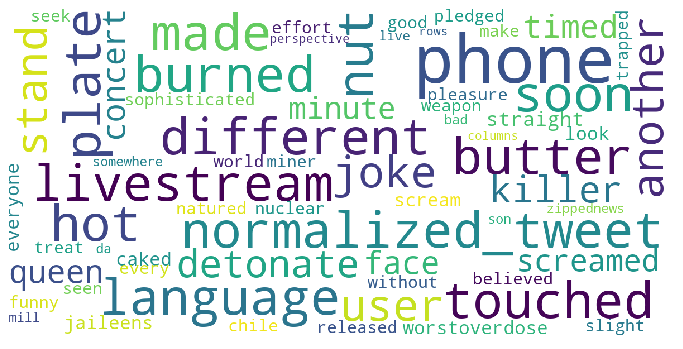

In [98]:
#show word cloud for positive sentiments 
show_wordcloud(positive_sentiments)


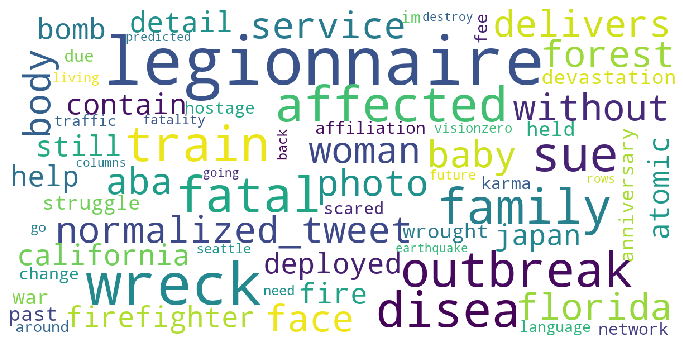

In [99]:
#word cloud for negative sentiments 
show_wordcloud(negative_sentiments)